# Deep Learning Notes - Implementation of a Single Node Neural Network
* Author: Jeffery Brown
* Topic: Deep Learning
* GitHub Repo: https://github.com/daddyjab/DL_Notes


## <font color="blue">Summary</font>
This Jupyter Notebook provides a Python implementation of a single node neural network, which was used to recognize a single digit "1" from a set of handwritten digits 0 through 9 using Logistic Regression.

1. First, key concepts are introduced:

    * A representation of a neural network node is introduced and key elements are described
    * Forward and Backward Propagation and their role in calculation of predictions and loss/cost (Forward Propagation) and in optimization of model coeffiencients using gradient descent (Backward Propagation) are discussed.
    * Python code snippets for performing the calculations is then shown, including use of the `numpy` library for vector and matrix calculations.
    
2. Next the single node neural network is implemented:

    * Dependencies and the MNIST dataset of handwritten digits 0 through 9 are loaded
    * Dataset is explored, including checking for missing or invalid values
    * The training and testing labels are changed from an integer 0 to 9 matching the handwritten digit image, to a 1 or 0 indicating that the image is (1) or is not (0) a target single digit selected for the analysis, and a helper function is defined and used to plot a sample of digits and their associated labels
    * Next, a class `SingleNode()` is defined that comprises the neural network node model, including methods for instantiation, parameter checking, fitting, prediction, and evaluation.  Attributes are defined for store key values such as model coefficients, flags indicating the status of fitting, etc.
    * The class is then used to instantiate a model, fit the training data to the model, make predictions using training and testing data, and then evaluate the predictions results.  A helper function is defined and used to plot the model fitting history, which are shown in a figure below.

## Results
The single node neural network was used fitted using 60,000 training examples in batches of 32 examples per iteration.  The results for some digits were very good, while the probably of correctly predicting the target digit was lower with other digits.
* With `SINGLE_TARGET_DIGIT = 1`, the model performed well, which might be expected since the digit `1` is fairly different in appearance than other digits 0 and 2 through 9.

| <b>Table DL-01-A: Single Node Neural Network Performance - Single Target Digit = 1</b> |
|:--------------------------------------------------------------------------------------:|

|            | Training Data | Testing Data |
|:------------|:---------------:|:--------------:|
| Count of Examples | 60,000 | 10,000 |
| Count of Target Digit in Examples | 6,742 (11.2%) | 1,135 (11.3%) |
| Accuracy | 0.9840 | 0.9861 |
| Probability of Predicting Correctly<br>when Example is the Target Digit | 0.9058 | 0.9075 |
| Probability of Predicting Correctly<br>when Example is Not the Target Digit | 0.9939 | 0.9962 |
| Fitting Epochs (Iterations) | 300 | n/a |
| Fitting Batch Size | 32 | n/a |
| Minimum Batch Loss | 0.0199 @ Epoch 206 | n/a |

<br>

* However, with `SINGLE_TARGET_DIGIT = 3`, a digit that is more easily confused with other digits, the model performed more poorly.
    * The probability of the model correctly predicting the target digit = 3 is low at 0.6525, reflecting the more difficult challenge in distinguishing 3 from digits such as 0 or 8.  The model is bias towards digits being non-target (vs. being the target digit 3).
    * The overall accuracy is high, but this is mainly because 88.7% of examples are *not* the target digit 3, and correct predictions of digits as being non-target is good at 0.9945.

| <b>Table DL-01-B: Single Node Neural Network Performance - Single Target Digit = 3</b> |
|:--------------------------------------------------------------------------------------:|

|            | Training Data | Testing Data |
|:------------|:---------------:|:--------------:|
| Count of Examples | 60,000 | 10,000 |
| Count of Target Digit in Examples | 6,131 (10.2% of total) | 1,010 (10.1% of total) |
| Accuracy | 0.9581 | 0.9600 |
| Probability of Predicting Correctly<br>when Example is the Target Digit | 0.6462 | 0.6525 |
| Probability of Predicting Correctly<br>when Example is Not the Target Digit | 0.9936 | 0.9945 |
| Fitting Epochs (Iterations) | 300 | n/a |
| Fitting Batch Size | 32 | n/a |
| Minimum Batch Loss | 0.0560 @ Epoch 128 | n/a |

<br><br>
* Going foward, the single node  neural network class can be modified to implement more capable neural networks with multiple nodes and layers.


| Figure DL-01-C: Model Fit History for a Single Node Neural Network - Single Target Digit = 1 | Figure DL-01-D: Model Fit History for a Single Node Neural Network - Single Target Digit = 3 |
|:----------:|:----------:|
| ![Figure DL-01-C: Model Fit History for a Single Node Neural Network - Single Target Digit = 1...](docs/DL-01-Figure-C-Model_Fit_History-Target_1.png "Figure DL-01-C: Model Fit History for a Single Node Neural Network - Single Target Digit = 1") | ![Figure DL-01-D: Model Fit History for a Single Node Neural Network - Single Target Digit = 3...](docs/DL-01-Figure-D-Model_Fit_History-Target_3.png "Figure DL-01-D: Model Fit History for a Single Node Neural Network - Single Target Digit = 3") |

<br><br>

<!--
| Figure DL-01-C: Model Fit History for a Single Node Neural Network - Single Target Digit = 1 |
|:----------:|
| ![Figure DL-01-C: Model Fit History for a Single Node Neural Network - Single Target Digit = 1...](docs/DL-01-Figure-C-Model_Fit_History-Target_1.png "Figure DL-01-C: Model Fit History for a Single Node Neural Network - Single Target Digit = 1") |

<br><br>
-->

<!--
| Figure DL-01-D: Model Fit History for a Single Node Neural Network - Single Target Digit = 3 |
|:----------:|
| ![Figure DL-01-D: Model Fit History for a Single Node Neural Network - Single Target Digit = 3...](docs/DL-01-Figure-D-Model_Fit_History-Target_3.png "Figure DL-01-D: Model Fit History for a Single Node Neural Network - Single Target Digit = 3") |

<br><br>
-->

## <font color="blue">Representation of a Single Neuron</font>
A single <b>Neuron</b> (<b>Node</b>) can be represented as shown in Figure DL-01-A: Representation of a Single Neuron.
<P>

| Figure DL-01-A: Representation of a Single Neuron |
|:----------:|
| ![Figure DL-01-A: Representation of a Single Neuron is Loading...](docs/DL-01-Figure-A-Single_Neuron.png "Figure DL-01-A: Representation of a Single Neuron ") |


### For this single neuron representation:
    
| Element | Description | Single Example (m=1) | Multiple Examples (m>1) |
|:------:|:-----------:|:--------------------:|:-----------------------:|
| Input<br>$x$ or $X$ | Input values representing one or more training or testing example | Vector $x$ of $n_x$ values with dimensions $(n_x$ rows$~\times~1$ column$) \to$ shape $(n_x,~1)$ | Matrix $X$ with dimensions $(n_x$ rows [values] $\times~m$ columns [examples] $)~\to$ shape $(n_x,~m)$ |
| Output<br>$a$ or $\widehat{y}$ | Output approximating the actual label value $y$ that corresponds to the input $x$ | Scalar value $a~=~\widehat{y}$ with dimensions $(1,~1)$ | Vector $a~=~\widehat{y}$ with dimensions $(1$ row [value] $\times~m$ columns [examples] $)~\to$ shape $(1,~m)$ |
| Weights<br>$w$ | Weighting coefficients associated with each of the $n_x$ input values | Vector $w$ with dimensions $(n_x$ rows$~\times~1$ column$) \to$ shape $(n_x,~1)$ | (Same as for single example ) |
| Bias<br>$b$ | Bias coefficient that is independent of the $n_x$ input values | Scalar value $b$ with dimensions $(1,~1)$ | (Same as for single example) |
| The factor<br>$z$ | The linear function $z~=~w^T x+b$ |  |  |
| Activation Function<br>$g(z)$ | A function which transforms the output of the linear function $z$ and is generally a nonlinear function such as: sigmoid $\sigma$, ReLU, TanH, etc.<br>See the section below: "[Activation Functions](#section_activation_functions)" |  |  |

## <font color="blue">Forward and Backward Propagation</font>
<P>
The accurancy of this neuron's prediction $\widehat{y}$ can be maximized by first defining a Loss function $\mathscr{L}(\widehat{y},~y)$ that indicates the distance of the prediction $\widehat{y}$ from the actual label value $y$ for one or more training examples.  An optimization algorithm (such as Gradient Descent) can then be used to approach a set of weight $w$ and bias $b$ coefficient values such that an overall Cost function is minimized.
    
* <b>Forward Propagation</b> is used to calculate the value of the output prediction $a~=~\widehat{y}$, as well as the overall cost using the Cost function $J(w,~b)$ underlying Loss function $\mathscr{L}(\widehat{y},~y)$.
* <b>Backward Propagation</b> is used to calculate the deratives of the Cost function and adjust the coefficients $w$ and $b$ to optimize the overall Cost to a minimum.

<P>
The Figure DL-01-B: Forward and Backward Propagation provides an indication of the direction of calculation in our single neuron model for forward and backward propagation.
<P>

| Figure DL-01-B: Forward and Backward Propagation |
|:----------:|
| ![Figure DL-01-B: Forward and Backward Propagation is Loading...](docs/DL-01-Figure-B-Forward_and_Backward_Propagation.png "Figure DL-01-B: Forward and Backward Propagation ") |

<a id='section_activation_functions'></a>
##  <font color="blue">Activation Functions</font>
There are many different types of <b>Activation functions</b>, each with their own characteristics of interest.  These functions are general non-linear.  A linear function has a constant derative, and as a results our optimization algorithm, which depends upon the deratives to change based upon the input values, would not converge as expected.

Some selected activation functions:

| Activation Function | Definition | Derivative |
|:-------------------:|:-----------:|:---------:|
| [Sigmoid](https://en.wikipedia.org/wiki/Logistic_function)<br>$\sigma$ | $g(z)~=~\sigma(z)~=~{ {1} \over {1 + e^{-z} } }$ | $g'(z)~=~\sigma'(z)~=~\sigma(z)(1-\sigma(z))$ |
| [Rectified Linear Unit](https://en.wikipedia.org/wiki/Rectifier_(neural_networks))<br>(ReLU) | $g(z)~=~max(0,z)~=~\lbrace~{{0~for~z\le 0} \atop {z~for~z>0} }$ | $g'(z)~=~\lbrace~{{0~for~z\le 0} \atop {1~for~z>0} }$ |
| [Hyperbolic Tangent](https://en.wikipedia.org/wiki/Hyperbolic_function#Hyperbolic_tangent)<br>(TanH) | $g(z)~=~tanh(z)~=~\frac{e^z - e^{-z}}{e^z + e^{-z}}~=~\frac{e^{2z} - 1}{e^{2z} + 1}$ | $g'(z)~=~tanh'(z)~=~1-f(z)^2$ |
|-------------------|-------------------------------------------------------|-----------------------------------------------------|

For this exploration, the Sigmoid $\sigma$ will be used as the activation function

Additional information on activation functions, including [Softmax](https://en.wikipedia.org/wiki/Softmax_function), is available at:
[Comparison of Activation Functions (Wikipedia)](https://en.wikipedia.org/wiki/Activation_function#Comparison_of_activation_functions)

<a id='section_loss_and_cost_functions'></a>
##  <font color="blue">Loss Function</font>
As noted previously, a <b>Loss function</b> $\mathscr{L}(\widehat{y},~y)$ quantifies the distance of the prediction $\widehat{y}$ from the actual label value $y$ for one or more training examples, which is needed to optimize the set of coefficients used by the neuron.

For this single neuron case, the [Logistic Loss](https://en.wikipedia.org/wiki/Loss_functions_for_classification#Logistic_loss) function will be used as the Loss function:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;
$\mathscr{L}(\widehat{y},~y)~=~-(y\log{(\widehat{y})}+(1-y)\log{(1-\widehat{y})}$
<br><br>
or using nomenclature $a~=~\widehat{y}$:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;
$\mathscr{L}(a,~y)~=~-(y\log{(a)}+(1-y)\log{(1-a)}$

For a single example and a given set of coefficients $w$ and $b$, the loss is $\mathscr{L}(\widehat{y},~y)$.

##  <font color="blue">Cost Function</font>
For multiple examples, the <b>Cost function</b> for coefficients $w$ and $b$ is defined as $J(w,~b)$, the average Logistic loss across all of the samples is given by:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;
$\eqalignno {
J(w,~b)
~&=~ {1 \over m} \sum_{i=1}^m \mathscr{L}(\widehat{y}^{(i)},~y^{(i)})\cr
~&=~ - {1 \over m} \sum_{i=1}^m \left [ ( y^{(i)} \log{(\widehat{y}^{(i)})}+(1-y^{(i)}) \log{(1-\widehat{y}^{(i)})} \right ]
}$

<br>
or using nomenclature $a~=~\widehat{y}$:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;
$J(w,~b)~=~ - {1 \over m} \sum_{i=1}^m \left [ ( y^{(i)} \log{(a^{(i)})}+(1-y^{(i)}) \log{(1-a^{(i)})} \right ] $

Additional information on loss functions, including [Loss functions for classification](https://en.wikipedia.org/wiki/Loss_functions_for_classification), is available at:
[Loss function (Wikipedia)](https://en.wikipedia.org/wiki/Loss_function)


##  <font color="blue">Forward Propagation Calculations</font>
As noted earlier, <b>Forward Propagation</b> is used to calculate the output $a$ and the Cost function $J(w,~b)$ (using the Loss function $\mathscr{L}(a,~y)$).

For m examples, using `python` and `numpy`:
* Linear equation: $Z~=~w^T X+b$
   
```
# Calculate the linear equation - vectorized: Z ~ shape(1,m)
Z = np.dot(w.T,X)+b
```
<br>
    
* Output from the Activation function: $a~=~ \widehat{y} ~=~ \sigma (z)~=~{ {1} \over {1 + e^{-z} } }$

```
# Define the sigmoid function - vectorized
def sigmoid(v):
    return 1 / (1 + np.exp(-v) )
    
# Calculate the output prediction from the sigmoid of the linear function - vectorized: A and Z ~ shape(1,m)
A = sigmoid(Z)
```
<br>
* Cost function: $J(w,~b)~=~ - {1 \over m} \sum_{i=1}^m \left [ ( y^{(i)} \log{(a^{(i)})}+(1-y^{(i)}) \log{(1-a^{(i)})} \right ]$ 
 
```
# Calculate the overall cost (vectorized) - vectorized: A and Y ~ shape(1,m), J ~ scalar
J = (1/m) * np.sum( Y*np.log(A) + (1-Y)*np.log(1-A) )
```

<a id='section_optimization'></a>
##  <font color="blue">Optimization using Gradient Descent</font>
This exploration, the gradient descent algorithm will be used to optimize the coeffients $w$ and $b$.

The Cost function $J(w,~b)$ is used for the optimization, with the gradient of the cost function at any point determining the next set of adjustments required of the coefficients $w$ and $b$ to move towards the miminum of the Cost function.

The gradient of the Cost function at a point is the set of partial derivatives of the cost function at that point for each of the coefficients $w$ and $b$:<br>

${{ \partial J(w,~b) } \over {\partial w}}$ &nbsp;&nbsp;and&nbsp;&nbsp; ${{ \partial J(w,~b) } \over {\partial b}}$

These partial deriatives can then be multiplied by a Learning Rate factor $\alpha$ to adjust the coefficients:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;
$w~=~w - \alpha {{ \partial J(w,~b) } \over {\partial w}}$, and<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;
$b~=~b - \alpha {{ \partial J(w,~b) } \over {\partial b}}$

The effect of this is that relatively larger gradient values (i.e., steeper slope towards or away from the minimum) will cause larger adjustments to the coefficients.  As the gradient approaches 0 (the minimum), its decreasing value results in smaller and smaller adjustments to the coefficients.

Additional information on the gradient descent algorithm is available at:
[Gradient descent (Wikipedia)](https://en.wikipedia.org/wiki/Gradient_descent)


##  <font color="blue">Backward Propagation Calculations</font>
Recalling several points:
* Linear equation: $z~=~w^T x+b$
* Output from the Activation function: $a~=~ \widehat{y} ~=~ \sigma (z)~=~{ {1} \over {1 + e^{-z} } }$
* Logistic loss function: $\mathscr{L}(a,~y)~=~-(y\log{(a)}+(1-y)\log{(1-a)}$
* Cost function: $J(w,~b)~=~ - {1 \over m} \sum_{i=1}^m \left [ ( y^{(i)} \log{(a^{(i)})}+(1-y^{(i)}) \log{(1-a^{(i)})} \right ]$

The relationship between the various factors can be represented as:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;
$(w, b, x) \to z \to a \to \mathscr{L}$

The partial deratives for ${{ \partial J(w,~b) } \over {\partial w}}$ and ${{ \partial J(w,~b) } \over {\partial b}}$ for $w$ and $b$ can be obtain working stepwise "backwards" (right-to-left) through the differentation, starting with the Loss function:<br><br>

$\eqalignno {
{ {\partial \mathscr{L}(a,~y)} \over {\partial a} } ~&=~ - { y \over a } + { (1-y) \over (1-a) } &(1)\cr\cr
{ {\partial \mathscr{L}(a,~y)} \over {\partial z} } ~&=~
    { {\partial \mathscr{L}(a,~y)} \over {\partial a} } \cdot
    { {\partial a } \over {\partial z} } ~=~
    \left [ - { y \over a } + { (1-y) \over (1-a) } \right ] \cdot \left [ a(1-a) \right ] ~=~
    a-y
    &(2)\cr\cr
{ {\partial \mathscr{L}(a,~y)} \over {\partial w} } ~&=~
    { {\partial \mathscr{L}(a,~y)} \over {\partial z} } \cdot { {\partial z } \over {\partial w} } ~=~
    { {\partial \mathscr{L}(a,~y)} \over {\partial z} } \cdot \left [ x \right ] ~=~
    \left [ a-y \right ] \cdot \left [ x \right ] ~=~
    x(a-y)
    ~ \left ( =~ x \cdot { {\partial \mathscr{L}(a,~y)} \over {\partial z} } \right )
    &(3)\cr
{ {\partial \mathscr{L}(a,~y)} \over {\partial b} } ~&=~
    { {\partial \mathscr{L}(a,~y)} \over {\partial z} } \cdot { {\partial z } \over {\partial b} } ~=~
    { {\partial \mathscr{L}(a,~y)} \over {\partial z} } \cdot \left [ 1 \right ] ~=~
    \left [ a-y \right ] \cdot \left [ 1 \right ] ~=~
    a-y
    ~ \left ( =~ { {\partial \mathscr{L}(a,~y)} \over {\partial z} } \right )
    &(4)\cr\cr
{ {\partial J(w,~b)} \over {\partial w} } ~&=~
    {1 \over m} \sum_{i=1}^m \left [ { {\partial \mathscr{L}(a,~y)} \over {\partial w}} \right ] ~=~
    {1 \over m} \sum_{i=1}^m \left [ x \cdot { {\partial \mathscr{L}(a,~y)} \over {\partial z} } \right ] ~=~    
    {1 \over m} \sum_{i=1}^m \left [ x(a-y) \right ]    
    &(5)\cr
{ {\partial J(w,~b)} \over {\partial b} } ~&=~
    {1 \over m} \sum_{i=1}^m \left [ { {\partial \mathscr{L}(a,~y)} \over {\partial b}} \right ] ~=~
    {1 \over m} \sum_{i=1}^m \left [ { {\partial \mathscr{L}(a,~y)} \over {\partial z} } \right ] ~=~    
    {1 \over m} \sum_{i=1}^m \left [ a-y \right ]    
    &(6)\cr
}$

Recalling the equations used to adjust the coefficients using Learning Rate $\alpha$:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;
$w~=~w - \alpha {{ \partial J(w,~b) } \over {\partial w}}$, and<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;
$b~=~b - \alpha {{ \partial J(w,~b) } \over {\partial b}}$

We can now calculate the iterative adjustments needed to the coefficients to minimize the cost.

For m examples, using `python` and `numpy`:
* `dz` = ${ {\partial \mathscr{L}(a,~y)} \over {\partial z} }$:

```
# Calculate the partial derivative of Loss by z
dz = A - Y
```
<br>
    
* `dw` = ${ {\partial \mathscr{L}(a,~y)} \over {\partial w} }$:

```
# Calculate the partial derivative of Loss by w
# NOTE: Multiplication of matrix X (features x examples) by vector dz transpose (examples x 1)
#       results in the summation of the product of each example's features and that's sample's dz value.
#       The summation in the dw formula is handled by this matrix x vector multiplication
dw = (1/m) * np.dot(X,dz.T)
```
<br>
    
* `db` = ${ {\partial \mathscr{L}(a,~y)} \over {\partial b} }$:

```
# Calculate the partial derivative of Loss by b
# NOTE: db is essentially the average of the values in the dz vector
#       (i.e., the average of the dz values for each example)
db = (1/m) * np.sum(dz)
```
<br>

* Adjustment to coefficients $w$ and $b$:

```
# Adjust the coefficients w and b
w = w - alpha * dw
b = b - alpha * db
```

The optimization is then implemented using a loop to iterate through the available training samples (in batches) and update the coefficients until the target number of iterations or the target training accuracy is reached.

# Dependencies

In [1]:
# Jeff's "standard" list of libraries to import  - overkill, but keeping them all for convenience... :)

%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D    # Support 3D graphing

import numpy as np
import pandas as pd
from pandas.plotting import table
import math
import random

from pprint import pprint


# Visualization
import graphviz
import pydotplus

from IPython.display import Image

# # Machine Learning - Data Preparation and Pre-Processing
# from sklearn.model_selection import train_test_split # Split data into training and testing samples
# from sklearn.model_selection import cross_val_score  # Score a model using k-fold or other cross validation

# from sklearn.preprocessing import OneHotEncoder   # Convert categorical integer features (X) to One-Hot encoded values
# from sklearn.preprocessing import LabelEncoder    # Convert categorical labeled values to categorical integer values
# from sklearn.preprocessing import LabelBinarizer  # Convert categorical labeled values to Binary encoded values

from sklearn.preprocessing import StandardScaler  # Scale numerical features to standard normal distribution
from sklearn.preprocessing import MinMaxScaler    # Scale numerical values based upon mix/max values

# # Machine Learning - Sci-Kit Learn - Models - Regression
# from sklearn.linear_model import LinearRegression  # TBD
# from sklearn.linear_model import Lasso             # TBD
# from sklearn.linear_model import Ridge             # TBD
# from sklearn.linear_model import ElasticNet        # TBD

# # Machine Learning - Sci-Kit Learn - Models - Classification
# from sklearn.linear_model import LogisticRegression   # Logistic Regression Classifier
# from sklearn import tree                              # Decision Tree Classifier
# from sklearn.ensemble import RandomForestClassifier   # Random Forest Classifier
# from sklearn import svm                               # Support Vector Machine Classifier
# from sklearn.neighbors import KNeighborsClassifier    # K-Nearest Neighbors (KNN)

# # Machine Learning - GridSearch for Hyper-Parameter tuning
# from sklearn.model_selection import GridSearchCV      # Grid Search

# # Machine Learning - Quantify Model Performance
# from sklearn.metrics import mean_squared_error    # Mean Squared Error (MSE) metric
# from sklearn.metrics import r2_score              # R-squared (Coefficient of Determination) metric
# from sklearn.metrics import confusion_matrix      # Generate a confusion matrix (actual vs. predicted counts)
# from sklearn.metrics import classification_report # Calculate metrics for prediction performance
# from sklearn.metrics import precision_score       # Calculate the precision: Tp / (Tp + Fp) => Ability to avoid false negatives
# from sklearn.metrics import recall_score          # Calculate the recall: Tp / (Tp + Fn) => Ability to find all positive samples
# from sklearn.metrics import f1_score              # Calculate the F1 score: 2*(precision*recall)/(precision+recall)

# # Machine Learning - Dataset Generation
# from sklearn.datasets import make_regression     # Generate linear data
# from sklearn.datasets import make_s_curve        # Generate nonlinear data
# from sklearn.datasets import make_blobs          # Generate blobs for classification
# from sklearn.datasets import make_circles        # Generate circles for classification
# from sklearn.datasets import load_iris           # Sample multi-class dataset for classification
# from sklearn.datasets import make_classification # Generate datasets for classification

# # Machine Learning - Keras (Tensorflow) - Models
# from keras.models import Sequential               # Sequential model serving as foundation for neural network
# from keras.layers import Dense                    # Nodes for specifying input, hidden, and output layers

# # Machine Learning - Keras (Tensorflow) - Encoding
# from keras.utils import to_categorical            # One-Hot Encoder provided through Keras

# # Machine Learning - Keras (Tensorflow) - Other related Tools
# from keras.utils import plot_model                # Plot a neural network model
# from keras.models import load_model               # Load a saved machine learning model
# from keras.preprocessing import image             # Loads an image for application of machine learning
# from keras.preprocessing.image import img_to_array # Converts an image to a numpy array

# Machine Learning - Keras (Tensorflow) -  Dataset Generation
from keras.datasets import mnist                  # Images: Handwritten digits 0-9 (28x28 grayscale, 60K train, 10K test)

Using TensorFlow backend.


# Handwritten Digits 0-9 Dataset

### Function to Plot Lists of Digits

In [2]:
# Function to plot a list of up to 10 digits on a single subplot
def plot_digit_list( a_X_list = None, a_y_list = None, a_find_all_digits = False):
    # The first 10 digits from the specified list
    
    # If no list is specified then return None        
    if (a_X_list is None):
        return None
    
    else:
        X_list = list(a_X_list)
        
    if (a_y_list is None):
        return None
    
    else:
        y_list = list(a_y_list)
        
    # Find All Digits flag
    #   If True => Find and plot all digits 0-9 within the list, starting at index 0
    #   If False => Plot up to the first 10 digits in the list
    if a_find_all_digits:

        # Flag is True: Get indices of samples for each of the digits 0-9 within the 1000 sample subset
        # If the digit is not present in the input list then move on to the next digit
        d_i_list = []
        for d in range(10):
            
            try:
                # Add the index at which this digit can be found to the list
                d_i_list.append( y_list.index(d) )
                
            except ValueError:
                # Digit is not present in the input list -- move on to the next digit
                pass

    else:
        # Flag is False: Get the indices for up to the first 10 values in the list
        d_i_list = range( min(10, len(y_list) ))
    
    # The iterpolation method to use for ploting the digit images
    i_type_selected = 'lanczos'

    print("Indices:", d_i_list)

    # Plot Classification Performance results: Best Score vs. Mean Fit Time (ms)
    fig = plt.figure(figsize=(20,9))

    # Create subplots for each of the sampled digits
    for i in range(len(d_i_list)):
        # Create a subplot for this iteration
        ax = fig.add_subplot( math.ceil(len(d_i_list)/min(5, len(d_i_list))), min(5, len(d_i_list)), i+1 )

        # Display a note for each subplot
        point_text = f"Label: {y_list[d_i_list[i]]}"
        point_text += f"\nSample Index: {d_i_list[i]}"
    #     ax.text(1, 2+1.4*point_text.count("\n"), point_text )
        ax.set_title(point_text)

        # Display the image
        ax.imshow(X_list[d_i_list[i]], cmap=plt.cm.Greys, interpolation=i_type_selected)
        
    # Return the number of digits plotted
    return i+1

### Load the MNIST Handwritten Digit Dataset

In [3]:
# Import the Keras MNIST handwritten digits sample dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


### Explore the Dataset

In [4]:
# Look for any missing data values in the training labels
sum(y_train == None)

0

In [5]:
# Check for imbalance in the training data
unique_targets = np.unique(y_train, return_counts=True)
unique_targets[1]

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64)

In [6]:
print(f"Mean: {np.mean(unique_targets[1])}, Median: {np.median(unique_targets[1])}")

Mean: 6000.0, Median: 5936.0


In [7]:
print(f"Max: {np.max(unique_targets[1])}, Min: {np.min(unique_targets[1])}")

Max: 6742, Min: 5421


In [8]:
print(f"Std Dev: {np.std(unique_targets[1])}")

Std Dev: 322.082908581005


In [9]:
# Normalized
(unique_targets[1] - np.mean(unique_targets[1]) ) / np.std(unique_targets[1])

array([-0.23906888,  2.30375466, -0.13040121,  0.40672757, -0.49055692,
       -1.79767378, -0.25459283,  0.82276952, -0.46261381, -0.15834432])

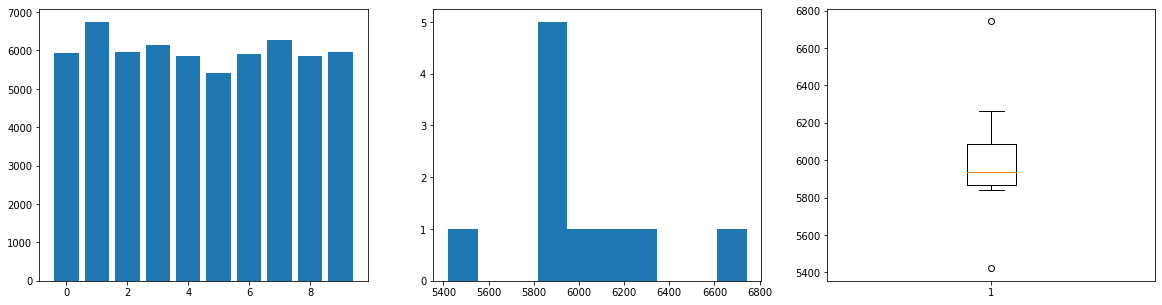

In [10]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# Column (bar) chart
ax1.bar(unique_targets[0], unique_targets[1])

# Histogram
h_retval = ax2.hist(unique_targets[1])

# Boxplot
b_retval = ax3.boxplot(unique_targets[1])

### Modify the Labels to a Single Class: Target Digit or Not-Target Digit

In [11]:
# For this single neuron exploration,
# perform a classification for only one digit as either
# the target digit or not the target digit
# TARGET_SINGLE_DIGIT = 3
TARGET_SINGLE_DIGIT = 1


In [12]:
# Create training and testing arrays that classify the digit as being either TARGET_SINGLE_DIGIT (1) or not (0)
y_train_single = np.array([ (1 if y==TARGET_SINGLE_DIGIT else 0) for y in y_train ])
print( f"Training Data: Count of TARGET_SINGLE_DIGIT [{TARGET_SINGLE_DIGIT}] = {np.sum(y_train_single)} occurences [{np.sum(y_train_single) / np.size(y_train_single):0.1%} of {np.size(y_train_single)} total examples]")
print( f"Training Data: y_train_single (a few samples): {y_train_single[10:20]}")
print("")

y_test_single = np.array([ (1 if y==TARGET_SINGLE_DIGIT else 0) for y in y_test ])
print( f"Testing Data: Count of TARGET_SINGLE_DIGIT [{TARGET_SINGLE_DIGIT}] = {np.sum(y_test_single)} occurences [{np.sum(y_test_single) / np.size(y_test_single):0.1%} of {np.size(y_test_single)} total examples]")
print( f"Testing Data: y_test_single (a few samples): {y_test_single[10:20]}")


Training Data: Count of TARGET_SINGLE_DIGIT [1] = 6742 occurences [11.2% of 60000 total examples]
Training Data: y_train_single (a few samples): [0 0 0 0 1 0 0 0 0 0]

Testing Data: Count of TARGET_SINGLE_DIGIT [1] = 1135 occurences [11.3% of 10000 total examples]
Testing Data: y_test_single (a few samples): [0 0 0 0 1 0 0 0 0 0]


In [13]:
# Quick check to make sure labels are correct
check_train_df = pd.DataFrame( { 'y_train': y_train, 'y_train_single': y_train_single }, columns=['y_train', 'y_train_single'])
check_test_df = pd.DataFrame( { 'y_test': y_test, 'y_test_single': y_test_single }, columns=['y_test', 'y_test_single'])

# Check for occurrences of mismatched labels
print( f"y_train_single: Not the Selected Target Single Digit, but Label == 1 => Occurences { sum( (check_train_df[ 'y_train'] != TARGET_SINGLE_DIGIT) & (check_train_df[ 'y_train_single'] == 1) )}" )
print( f"y_train_single: Is the Selected Target Single Digit, but Label == 0 => Occurrences { sum( (check_train_df[ 'y_train'] == TARGET_SINGLE_DIGIT) & (check_train_df[ 'y_train_single'] == 0) )}" )
      
print( f"y_test_single: Not the Selected Target Single Digit, but Label == 1 => Occurences { sum( (check_test_df[ 'y_test'] != TARGET_SINGLE_DIGIT) & (check_test_df[ 'y_test_single'] == 1) )}" )
print( f"y_test_single: Is the Selected Target Single Digit, but Label == 0 => Occurrences { sum( (check_test_df[ 'y_test'] == TARGET_SINGLE_DIGIT) & (check_test_df[ 'y_test_single'] == 0) )}" )

y_train_single: Not the Selected Target Single Digit, but Label == 1 => Occurences 0
y_train_single: Is the Selected Target Single Digit, but Label == 0 => Occurrences 0
y_test_single: Not the Selected Target Single Digit, but Label == 1 => Occurences 0
y_test_single: Is the Selected Target Single Digit, but Label == 0 => Occurrences 0


Indices: range(0, 10)


10

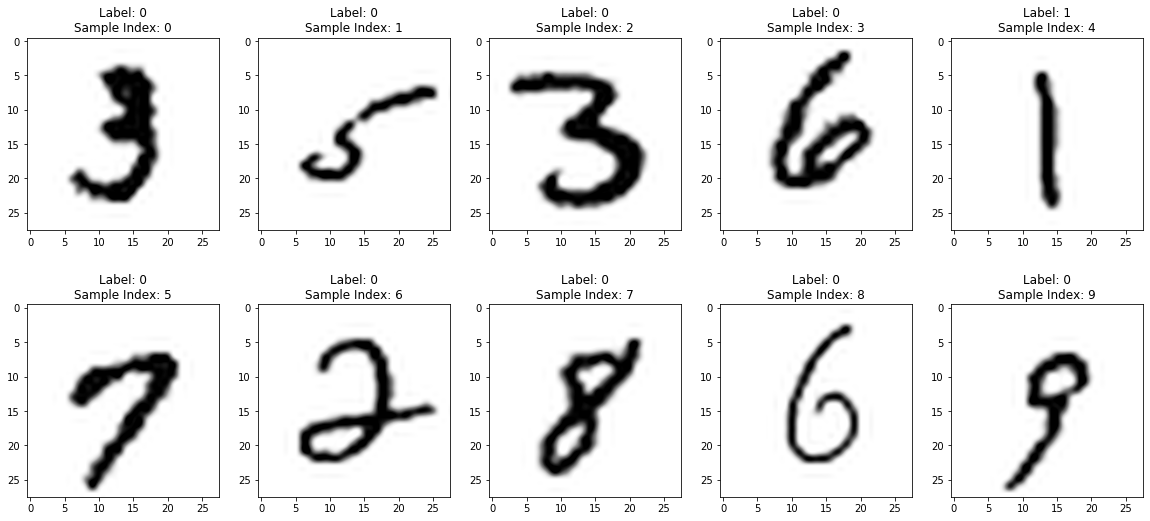

In [14]:
# Plot some samples from the training data
plot_digit_list(X_train[10:20], y_train_single[10:20], False)

Indices: range(0, 10)


10

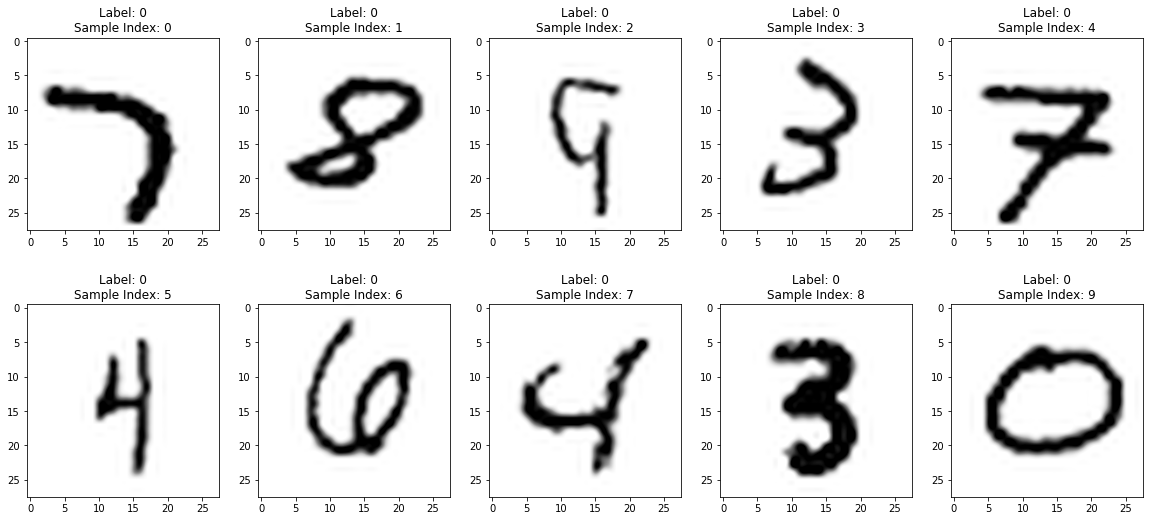

In [15]:
# Plot some samples from the testing data
plot_digit_list(X_test[60:70], y_test_single[60:70], False)

In [16]:
# Display the current shape of the input and output data
print(X_train.shape, y_train_single.shape, X_test.shape, y_test_single.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [17]:
# Flatten the 28x28 pixel images to a 1D array of 784 pixels
ndims = X_train.shape[1] * X_train.shape[2]
X_train_flat = X_train.reshape(X_train.shape[0], ndims)
X_test_flat = X_test.reshape(X_test.shape[0], ndims)
print(X_train_flat.shape, X_test_flat.shape)

(60000, 784) (10000, 784)


In [18]:
# Use a scalar to scale the training data to values between 0 and 1 (MinMaxScalar)
# Q: How would the results differ if we applied StandardScalar instead of MixMaxScalar
x_scalar = MinMaxScaler().fit(X_train_flat)
X_train_scaled = x_scalar.transform(X_train_flat)
X_test_scaled = x_scalar.transform(X_test_flat)

In [19]:
# No need to apply One-Hot Encoding to the labels
# because we have limited the classification to only 2 values (0 or 1)
n_classes = 2
# y_train_encoded = to_categorical(y_train, n_classes)
# y_test_encoded = to_categorical(y_test, n_classes)
y_train_encoded = y_train_single
y_test_encoded = y_test_single

In [20]:
# Display the shape of the input and output data
print(X_train_scaled.shape, y_train_encoded.shape, X_test_scaled.shape, y_test_encoded.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


# Define the class for the model

In [21]:
class SingleNode():
    """
    class SimpleNode
    
    An implementation of a single neuron node.
    """
    
    def __init__(self):
        """
        Constructor for the SimpleNode class
        """
        
        self.fit_is_done = False

        self.fit_alpha = None
        self.fit_batch_size = None
        self.fit_max_iter = None

        self.fit_n_iter = None
        self.fit_nsamples = None
        self.fit_iterations = None

        self.fit_coefficient_w = None
        self.fit_coefficient_b = None

        self.fit_history = None
                
        self.fit_train_accuracy = None

        self.eval_is_done = False
        self.eval_accuracy = None
        self.eval_predict_prob = None
        
    def __repr__(self):
        """
        Return an "official" string representation of the object
        """
        
        # Get the list of all class attributes
        attribute_list = dict(vars( self ))

        # Remove coefficients from the output if they are present -- too many values to casually display them!
        attribute_list.pop('fit_coefficient_w', None)
        attribute_list.pop('fit_coefficient_b', None)
        attribute_list.pop('fit_history', None)
        
        # Return the list as a string
        retval = f"{self.__class__.__name__}({attribute_list})"        
        return retval
    
    def __str__(self):
        """
        Return an "friendly" string representation of the object
        """
        
        # For now, just return whatever is generated from __repr__
        retval = self.__repr__()
        return retval
        
    def _set_fit_attributes(self, a_X_train, a_y_train, a_alpha, a_batch_size, a_max_iter):
        """
        Perform fit argument checks and set class attributes
        """
        try:
            if int(a_batch_size) > 0:
                self.fit_batch_size = int(a_batch_size)
            else:
                # Create an error message
                err_str  = f"Error in object {self.__class__.__name__}:\n"
                err_str += f"\tBatch size must be a number > 0\n"
                err_str += f"\tbatch_size = {a_batch_size} [{type(a_batch_size)}]"
                raise ValueError(err_str)
                            
        except Exception as e:
            # Re-raise the exception that got us here,
            # including any error message passed along
            raise
            
        # Set attribute: alpha
        try:
            if float(a_alpha) > 0.0:
                self.fit_alpha = float(a_alpha)
            else:
                # Create an error message
                err_str  = f"Error in object {self.__class__.__name__}:\n"
                err_str += f"\tLearning Rate alpha must be a number > 0.0\n"
                err_str += f"\talpha = {a_alpha} [{type(a_alpha)}]"
                raise ValueError(err_str)
                            
        except Exception as e:
            # Re-raise the exception that got us here,
            # including any error message passed along
            raise

        try:
            if (a_max_iter != None):
                if int(a_max_iter) > 0:
                    self.fit_max_iter = int(a_max_iter)
                else:
                    # Create an error message
                    err_str  = f"Error in object {self.__class__.__name__}:\n"
                    err_str += f"\tMaximum Iterations must be a number > 0\n"
                    err_str += f"\tmax_iter = {a_max_iter} [{type(a_max_iter)}]"
                    raise ValueError(err_str)
                            
        except Exception as e:
            # Re-raise the exception that got us here,
            # including any error message passed along
            raise
            
        # Check for errors in the X and y training data
        try:
            # Ensure that the number of x and y examples match
            if a_X_train.shape[0] == a_y_train.shape[0]:
                # Save the number of examples (samples) in the training data
                self.fit_nsamples = a_X_train.shape[0]
                
            # Ensure that at least one feature has been provided
            if a_X_train.shape[1] > 0:
                # Save the number of features in the training data
                self.fit_train_nfeat = a_X_train.shape[1]
                
            else:
                # Create an error message
                err_str  = f"Error in object {self.__class__.__name__}:\n"
                err_str += f"\tNumber of training samples different for X vs y\n"
                err_str += f"\tX_train.shape = {a_X_train.shape}, y_train.shape = {a_y_train.shape}"
                raise ValueError(err_str)
                            
        except Exception as e:
            # Re-raise the exception that got us here,
            # including any error message passed along
            raise
            
    @staticmethod
    def sigmoid(a_vector):
        """
        Static method to calculate the sigmoid activation function
        """
        return 1 / (1 + np.exp(-a_vector) )    

    def fit(self, a_X_train, a_y_train, a_alpha = 0.01, a_batch_size = 32, a_max_iter = None):
        """
        Fit the model coefficients w and b to the training data with specified arguments
        """
        
        # Set DEBUG_LEVEL
        DEBUG_LEVEL = 0

        # Set attributes, including basic error checking
        self._set_fit_attributes(a_X_train, a_y_train, a_alpha, a_batch_size, a_max_iter)
        
        # Do a basic loop through the samples for now
        # NEXT: Create a generator function to automatically manage batches
        
        # Calculate the number of iterations available given
        # the training sample size and the batch size
        n_iter = int(self.fit_nsamples / self.fit_batch_size)
        
        # Limit the number of iterations to fit_max_iter if specified
        if self.fit_max_iter != None:
            n_iter = min(self.fit_max_iter, n_iter)
        
        # Initialize fit history
        self.fit_history = {
            'cost': [],
            'accuracy': []
            }
        
        # Initialize the coefficients w ~shape(self.fit_train_nfeat, 1)
        w = np.zeros(self.fit_train_nfeat).reshape(-1,1)
        
        # Initialize the coefficient b ~shape(1,1)
        b = 0
        
        # Loop through the iterations
        progress_str = ""
        for i in range(n_iter):
            
            # Get the batch of fit_batch_size examples for this iteration for X and y
            # X_batch: a_X_train has shape (examples, features), so transpose to get (features, examples)
            # y_batch: a_y_train has shape (examples, 1), so transpose to get (1, examples)
            # POSSIBILITY: Could implement batching using numpy masked arrays
            # POSSIBILITY: Could implement batching using a generator function
            X_batch = a_X_train[i*self.fit_batch_size:(i+1)*self.fit_batch_size].T
            y_batch = a_y_train[i*self.fit_batch_size:(i+1)*self.fit_batch_size].reshape(-1,1).T
            
            # DEBUG
            if DEBUG_LEVEL >=2:
                print(f"\nDEBUG: fit() -> After Batch")
                print(f"w ~shape: {w.shape}, w.T ~shape: {w.T.shape}")
                print(f"X_batch ~shape: {X_batch.shape}, X_batch.T ~shape: {X_batch.T.shape}")
                print(f"y_batch ~shape{y_batch.shape}, y_batch.T ~shape{y_batch.T.shape}")
            
            # Calculate the linear equation
            Z = np.dot(w.T, X_batch) + b

            if DEBUG_LEVEL >=2:
                print(f"\nDEBUG: fit() -> After Linear Equation (Z)")
                print(f"Z ~shape{Z.shape}, Z.T ~shape{Z.T.shape}")

            # Calculate the output prediction from the sigmoid of the linear function - vectorized: A and Z ~ shape(1,m)
            A = self.sigmoid(Z)

            if DEBUG_LEVEL >=2:
                print(f"\nDEBUG: fit() -> After Activation (A)")
                print(f"A ~shape{A.shape}, A.T ~shape{A.T.shape}")

            # Calculate the partial derivative of Loss by z
            dz = A - y_batch

            if DEBUG_LEVEL >=2:
                print(f"\nDEBUG: fit() -> After Partial Derivative (dz)")
                print(f"dz ~shape{dz.shape}, dz.T ~shape{dz.T.shape}")

            # Calculate the partial derivative of Loss by w
            dw = (1/self.fit_batch_size) * np.dot(X_batch,dz.T)

            if DEBUG_LEVEL >=2:
                print(f"\nDEBUG: fit() -> After Partial Derivative (dw)")
                print(f"dw ~shape{dw.shape}, dw.T ~shape{dw.T.shape}")

            # Calculate the partial derivative of Loss by b
            db = (1/self.fit_batch_size) * np.sum(dz)

            if DEBUG_LEVEL >=2:
                print(f"\nDEBUG: fit() -> After Partial Derivative (db)")
                print(f"db ~shape{db.shape}, db.T ~shape{db.T.shape}")

            # Use the derivatives to adjust the coefficients w and b
            w -= self.fit_alpha * dw
            b -= self.fit_alpha * db
            
            if DEBUG_LEVEL >=2:
                print(f"\nDEBUG: fit() -> After Update of Coefficients (w, b)")
                print(f"w ~shape: {w.shape}, w.T ~shape: {w.T.shape}")

            # Calculate the overall cost (vectorized) - vectorized: A and Y ~ shape(1,m), J ~ scalar
            J = - (1/self.fit_batch_size) * np.sum( y_batch*np.log(A) + (1-y_batch)*np.log(1-A) )

            # Add the Cost value J(w,b) to the fit history
            self.fit_history['cost'].append(J)

            # Calculate the batch accuracy for this iteration
            # NOTE: A-Y = dz, which is already calculated
            # ALSO: dz will be ~0 when A matches Y
            batch_accuracy = 1 - ( np.sum(np.round(np.abs(dz))) / self.fit_batch_size )
            
            # Add the accuracy to the fit history
            self.fit_history['accuracy'].append(batch_accuracy)
            
            # Display a progress update
            if DEBUG_LEVEL >= 1:
                progress_str = f"[{i}]: Batch Cost J(w,b)={J:0.4f}, Batch Accuracy={batch_accuracy:0.4f}"
                print(progress_str)
            
        # Save the coefficient values
        self.fit_coefficient_w = w
        self.fit_coefficient_b = b
        
        # Save the number of iterations performed
        self.fit_iterations = n_iter
        
        # Set the flag that fit has been performed
        self.fit_is_done = True

        # Return a string providing the model attributes
        retval = self.__repr__()   
        return retval
        
    def predict(self, a_X_vals):
        """
        Predict the y labels associated with the X feature input
        """
        
        # Ensure that the model has already been fitted
        assert self.fit_is_done, "The model must be fitted before making predictions"

        # DEBUG
        DEBUG_LEVEL = 0
        
        # DEBUG
        if DEBUG_LEVEL >=2:
            print(f"\nDEBUG: fit() -> After Batch")
            print(f"w ~shape: {self.fit_coefficient_w.shape}, w.T ~shape: {self.fit_coefficient_w.T.shape}")
            print(f"X ~shape: {a_X_vals.shape}, X.T ~shape: {a_X_vals.T.shape}")

        # Calculate the linear equation
        # NOTE: Need the transpose of a_X_vals.T since it is
        #       (examples x features) and we need (features x examples)
        Z = np.dot(self.fit_coefficient_w.T, a_X_vals.T) + self.fit_coefficient_b

        if DEBUG_LEVEL >=2:
            print(f"\nDEBUG: fit() -> After Linear Equation (Z)")
            print(f"Z ~shape{Z.shape}, Z.T ~shape{Z.T.shape}")

        # Calculate the output prediction from the sigmoid of the linear function - vectorized: A and Z ~ shape(1,m)
        A = self.sigmoid(Z)
        
        if DEBUG_LEVEL >=2:
            print(f"\nDEBUG: fit() -> After Activation (A)")
            print(f"A ~shape{A.shape}, A.T ~shape{A.T.shape}")

        # Reshape prediction array A to single dimension
        A = A.reshape(-1)
        
        # Round the values 
        A_round = np.round(A).astype(int)
        
        # Return the prediction
        return A_round

    def evaluate(self, a_y_predict, a_y_actual):
        """
        Evaluate the model for accuracy
        """

        y_pred = a_y_predict.reshape(-1)
        y_act = a_y_actual.reshape(-1)
        
        # Perform basic arg checking 
        assert y_pred.shape == y_act.shape, \
                f"Arrays y_predict [shape {a_y_predict.shape}] and y_actual [shape {a_y_actual.shape}] must have the same dimensions"

        # Calculate the accuracy
        # a_y_predict - a_y_actual will be close to 0 when the prediction is correct,
        # and will be close to +/-1 when the prediction is incorrect
        # So to calculate the overall accuracy:
        # * Take the absolute value of (a_y_predict-a_y_actual)
        # * Round the result so that we get either 1.0 or 0.0
        # * Sum up the result so that we have a count of incorrect predictions
        # * Divide the sum by the number of examples
        # * Subtract the result from 1.0 to get the accuracy of the model
        predict_accuracy = 1.0 - ( np.sum(np.round(np.abs(y_pred-y_act))) / np.size(y_act) )
    
        # Calculate the probability of predicting 1 given label is 1
        # Create a condition array with True where the actual label is 1
        cond_label_is_1 = (y_act == 1)

        # Apply the condition array to the prediction array to get 
        # all prediction values where the actual label is 1
        y_pred_for_label_1 = np.extract(cond_label_is_1, y_pred)
        
        # Summing provides a count of the 1 values
        predict_proba_label_1 = sum(y_pred_for_label_1) / sum(cond_label_is_1)
    
        # Apply the condition array to the prediction array to get 
        # all prediction values where the actual label is 0 (i.e., not 1)
        y_pred_for_label_0 = np.extract(np.logical_not(cond_label_is_1), y_pred)
        
        # Summing provides a count of the 1 values / all of the 0 values
        predict_proba_label_0 = 1 - (sum(y_pred_for_label_0) / sum(np.logical_not(cond_label_is_1)) )

        # Return the accuracy
        retval = {
            'predict_accuracy': predict_accuracy,
            'predict_proba_label_1': predict_proba_label_1,
            'predict_proba_label_0': predict_proba_label_0
        }
        return retval

In [22]:
def plot_fit_history(a_fit_hist, a_valid_info = None):
    """
    Plot the fit history, including Loss (i.e., Cost) and Training Accuracy if provided
    """
    
    # Check fit history arguments
    try:
        # Get the cost and accuracy lists from the fit history dictionary
        h_cost = list(a_fit_hist['cost'])
        h_accuracy = list(a_fit_hist['accuracy'])

        if len(h_cost) == 0 or len(h_accuracy) == 0 or len(h_cost) != len(h_accuracy):
            # Create an error message
            err_str  = f"Error:\n"
            err_str += f"\tNo cost and/or accuracy history provided\n"
            err_str += f"\tCost [{len(h_cost)} values], Accuracy [{len(h_accuracy)} values]"
            raise ValueError(err_str)

    except Exception as e:
        # Re-raise the exception that got us here,
        # including any error message passed along
        raise
    
    # Check optional validation info arguments, if provided
    try:
        # Get the overall cost and accuracy scalar values from the validation info dictionary
        v_cost = None
        v_accuracy = None

        if isinstance(a_valid_info,dict) and a_valid_info is not None:
            if 'cost' in a_valid_info.keys():
                v_cost = float(a_valid_info['cost'])

            if 'accuracy' in a_valid_info.keys():
                v_accuracy = float(a_valid_info['accuracy'])

    except Exception as e:
        # Re-raise the exception that got us here,
        # including any error message passed along
        raise
    
    fig1 = plt.figure(figsize=(10,10))

    # Create a single plot of all results
    ax1 = fig1.add_subplot( 2,1,1 )
    ax2 = fig1.add_subplot( 2,1,2 )

    # X-axis - number of epochs in the fit history
    x_vals = range(len(h_cost))

    # Plots
    ax1.set_ylim(ymin=0.9*min(h_accuracy), ymax=1.1)
    ax1.plot( x_vals, h_accuracy,
              label='Accuracy (Training)', c='k', linestyle='-')

    ax2.plot( x_vals, h_cost,
              label='Loss (Training)', c='k', linestyle='-')

    # Add text note on the max and min accuracy and loss points
    acc_min_idx = np.argmin(h_accuracy)
    ax1.text( x=acc_min_idx, y=h_accuracy[acc_min_idx]*1.02, c='b',
              s=f"Min: {h_accuracy[acc_min_idx]:.4f}\nEpoch: {acc_min_idx}" )

    acc_max_idx = np.argmax(h_accuracy)
    ax1.text( x=acc_max_idx, y=h_accuracy[acc_max_idx]*1.02, c='b',
              s=f"Max: {h_accuracy[acc_max_idx]:.4f}\nEpoch: {acc_max_idx}" )

    loss_min_idx = np.argmin(h_cost)
    ax2.text( x=loss_min_idx, y=h_cost[loss_min_idx]*1.02, c='r',
              s=f"Min: {h_cost[loss_min_idx]:.4f}\nEpoch: {loss_min_idx}" )

    loss_max_idx = np.argmax(h_cost)
    ax2.text( x=loss_max_idx, y=h_cost[loss_max_idx]*1.02, c='b',
              s=f"Max: {h_cost[loss_max_idx]:.4f}\nEpoch: {loss_max_idx}" )
    
    # Add text note on the accuracy plot at the point when the loss is minimized
    ax1.text( x=loss_min_idx, y=h_accuracy[loss_min_idx]*1.02, c='r',
              s=f"Accuracy: {h_accuracy[loss_min_idx]:.4f}\n@ Min Loss:{h_cost[loss_min_idx]:.4f}\nEpoch: {loss_min_idx}" )

    # If populated, plot the accuracy from the test samples
    try:
        if v_accuracy is not None:
            # ax1.text( x=min(x_vals), y=v_accuracy*1.02, c='darkgreen', s=f"{v_accuracy:.4f}")
            ax1.text( x=max(x_vals), y=v_accuracy*1.02, c='darkgreen', s=f"Testing:\n{v_accuracy:.4f}")
            ax1.hlines(y=v_accuracy, xmin=min(x_vals), xmax=max(x_vals),
                      label='Accuracy (Testing)', color='g', linewidth=3, linestyle=':')    
    except:
        pass

    # If populated, plot the Loss (Cost) from the test samples
    try:
        if v_cost is not None:
            ax2.text( x=min(x_vals), y=v_cost*1.02, c='darkgreen', s=f"{v_cost:.4f}")
            ax2.hlines(y=v_cost, xmin=min(x_vals), xmax=max(x_vals),
                      label='Loss (Testing)', color='g', linewidth=3, linestyle=':')
    except:
        pass

    ax1.legend(loc='lower right')
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Batch Accuracy")
    ax1.set_title("Model Fitting History - Accuracy")

    ax2.legend(loc='upper right')
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Batch Loss")
    ax2.set_title("Model Fitting History - Loss")

    fig1.savefig("docs/DL-01-Figure-C-Model_Fit_History.png")

# Instantiate a single node model using the `SingleNode()` class

In [23]:
# Instantiate the single node model using the SingleNode() class
model = SingleNode()
print(model)

SingleNode({'fit_is_done': False, 'fit_alpha': None, 'fit_batch_size': None, 'fit_max_iter': None, 'fit_n_iter': None, 'fit_nsamples': None, 'fit_iterations': None, 'fit_train_accuracy': None, 'eval_is_done': False, 'eval_accuracy': None, 'eval_predict_prob': None})


# Fit the model to the training data

In [24]:
# Use the SingleNode() model fit() method to fit the model to the training data
retval = model.fit(X_train_scaled, y_train_encoded, 0.05, 32, 300)
print(retval)

SingleNode({'fit_is_done': True, 'fit_alpha': 0.05, 'fit_batch_size': 32, 'fit_max_iter': 300, 'fit_n_iter': None, 'fit_nsamples': 60000, 'fit_iterations': 300, 'fit_train_accuracy': None, 'eval_is_done': False, 'eval_accuracy': None, 'eval_predict_prob': None, 'fit_train_nfeat': 784})


# Make Predictions using the fitted model

In [25]:
# Make predictions using the training data
y_act_train = y_train_encoded[:]
y_pred_train = model.predict(X_train_scaled[:,:])

# Evaluate the performance of the model based upon the training data
retval_train = model.evaluate(y_pred_train, y_act_train )
print(f"Prediction Performance using Training Data ({np.size(y_act_train)} examples):")
print(f"\tAccuracy: {retval_train['predict_accuracy']:0.4f}")
print(f"\tProbability of Predicting Correctly when Actual Label is Target Digit: {retval_train['predict_proba_label_1']:0.4f}")
print(f"\tProbability of Predicting Correctly when Actual Label is Not the Target Digit: {retval_train['predict_proba_label_0']:0.4f}")
print("")

# Make predictions using the testing data
y_act_test = y_test_encoded[:]
y_pred_test = model.predict(X_test_scaled[:,:])

# Evaluate the performance of the model based upon the training data
retval_test = model.evaluate(y_pred_test, y_act_test )
print(f"Prediction Performance using Testing Data ({np.size(y_act_test)} examples):")
print(f"\tAccuracy: {retval_test['predict_accuracy']:0.4f}")
print(f"\tProbability of Predicting Correctly when Actual Label is Target Digit: {retval_test['predict_proba_label_1']:0.4f}")
print(f"\tProbability of Predicting Correctly when Actual Label is Not the Target Digit: {retval_test['predict_proba_label_0']:0.4f}")


Prediction Performance using Training Data (60000 examples):
	Accuracy: 0.9840
	Probability of Predicting Correctly when Actual Label is Target Digit: 0.9058
	Probability of Predicting Correctly when Actual Label is Not the Target Digit: 0.9939

Prediction Performance using Testing Data (10000 examples):
	Accuracy: 0.9861
	Probability of Predicting Correctly when Actual Label is Target Digit: 0.9075
	Probability of Predicting Correctly when Actual Label is Not the Target Digit: 0.9962


# Plot the Model Fitting History

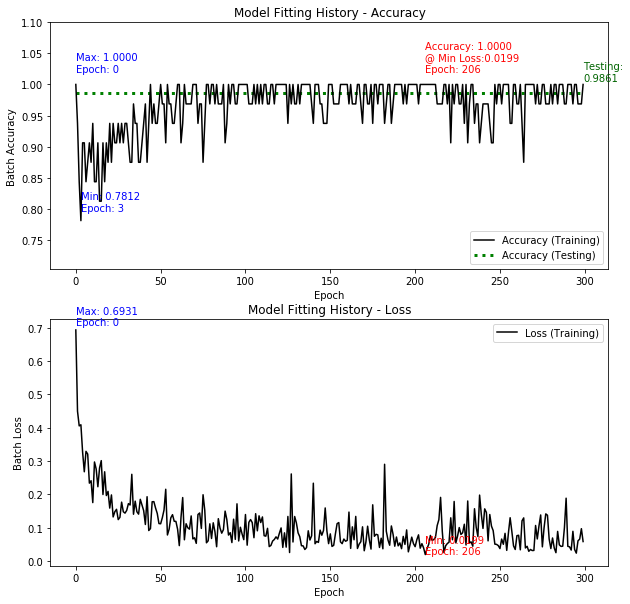

In [26]:
plot_fit_history(model.fit_history, {'accuracy': retval_test['predict_accuracy']} )